Задание по анализу данных
	
Кейс

"Рекламодатель КОЛОКОЛЬЧИК отмечает значительный рост CPA по своим рекламным кампаниям в последние
4 месяца (с июля по октябрь 2023). Ваша задача проанализировать его размещение по ряду показателей
(CPA, CTR, CPC, CR) с целью:

1) Выяснить причины роста CPA в июле-октябре 2023
2) Дать рекомендации по снижению и стабилизации CPA до целевого значения (600 руб)
3) Предложить стратегию масштабирования рекламных кампаний "
	
Исходные данные
Лист data
	
Описание столбцов таблицы на Листе data 

BannerType – тип объявления
CampaignType – тип кампании
Category – категория кампании
Date – период
Client – название клиента
Device – тип устройства (моб/десктоп)
Place – тип площадки (Поиск/сети)
QueryType – тип запроса (брендовые/общие/конкурентные запросы)
TargetingType – тип таргетинга
Clicks – клики
Cost - расходы 
Conversions – целевые визиты
Shows – показы 
	
Ожидаемый результат
- Презентация в ppt с выводами и графиками
- Исходники с расчетами в свободном, но структурированном и читаемом формате (на ваше усмотрение - ссылки на xlsx-файл, data studio, bi и тд)
	
	



In [1]:
import pandas as pd
import numpy as np
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [30]:
# Считываем данные из экселя.
df = pd.read_excel('yandex_data.xlsx')
df.head()

,BannerType,CampaignType,Category,Client,Date,Device,Place,QueryType,TargetingType,Clicks,Cost,Conversions,Shows
0,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Autotargeting,Autotargeting,0,0.0,0,0
1,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Phrase,Phrase,0,0.0,0,0
2,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Retargeting,Retargeting,0,0.0,0,0
3,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Brand,Phrase,0,0.0,0,0
4,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Other,Autotargeting,0,0.0,0,0


In [31]:
#Фильтруем только нужную нам компанию Колокольчик

df_kolok = df[df.Client == 'КОЛОКОЛЬЧИК']
print("Количество различных компаний: ", df_kolok['Client'].nunique())
df_kolok.head()

Количество различных компаний:  1


,BannerType,CampaignType,Category,Client,Date,Device,Place,QueryType,TargetingType,Clicks,Cost,Conversions,Shows
0,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Autotargeting,Autotargeting,0,0.0,0,0
1,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Phrase,Phrase,0,0.0,0,0
2,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Retargeting,Retargeting,0,0.0,0,0
3,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Brand,Phrase,0,0.0,0,0
4,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Other,Autotargeting,0,0.0,0,0


In [61]:
def calculate_cpa(cost, conversions):
    if conversions == 0:
        return 0
    elif cost == 0:
        return 0
    return cost / conversions
    
def calculate_ctr(clicks, shows):
    if shows == 0:
        return 0
    elif clicks == 0:
        return 0
    return (clicks / shows) * 100
    
def calculate_cpc(cost, clicks):
    if clicks == 0:
        return 0
    elif cost == 0:
        return 0
    return cost / clicks

def calculate_cr(conversions, clicks):
    if clicks == 0:
        return 0
    elif conversions == 0:
        return 0 
    return (conversions / clicks) * 100  # Умножаем на 100 для получения процентов

In [34]:
df_kolok['CPA'] = df_kolok.apply(lambda row: calculate_cpa(row['Cost'], row['Conversions']), axis=1)
df_kolok['CTR'] = df_kolok.apply(lambda row: calculate_ctr(row['Clicks'], row['Shows']), axis=1)
df_kolok['CPC'] = df_kolok.apply(lambda row: calculate_cpc(row['Cost'], row['Clicks']), axis=1)
df_kolok.head()

C:\Users\besku\AppData\Local\Temp\ipykernel_17004\1036811304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kolok['CPA'] = df_kolok.apply(lambda row: calculate_cpa(row['Cost'], row['Conversions']), axis=1)
C:\Users\besku\AppData\Local\Temp\ipykernel_17004\1036811304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kolok['CTR'] = df_kolok.apply(lambda row: calculate_ctr(row['Clicks'], row['Shows']), axis=1)
C:\Users\besku\AppData\Local\Temp\ipykernel_17004\1036811304.py:3: SettingWithCopyWarnin

,BannerType,CampaignType,Category,Client,Date,Device,Place,QueryType,TargetingType,Clicks,Cost,Conversions,Shows,CPA,CTR,CPC
0,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Autotargeting,Autotargeting,0,0.0,0,0,0.0,0.0,0.0
1,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Phrase,Phrase,0,0.0,0,0,0.0,0.0,0.0
2,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Retargeting,Retargeting,0,0.0,0,0,0.0,0.0,0.0
3,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Brand,Phrase,0,0.0,0,0,0.0,0.0,0.0
4,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Other,Autotargeting,0,0.0,0,0,0.0,0.0,0.0


In [39]:
#Расчитываем средний CPA
average_cpa = df_kolok['CPA'].mean()
average_cpa

174.17070292055448

In [41]:
#Добавляем колонка ме
df_kolok['Month'] = pd.DatetimeIndex(df_kolok['Date']).month
df_kolok

C:\Users\besku\AppData\Local\Temp\ipykernel_17004\2736252734.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kolok['Month'] = pd.DatetimeIndex(df_kolok['Date']).month


,BannerType,CampaignType,Category,Client,Date,Device,Place,QueryType,TargetingType,Clicks,Cost,Conversions,Shows,CPA,CTR,CPC,Month
0,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Autotargeting,Autotargeting,0,0.000000,0,0,0.0,0.000000,0.000000,1
1,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Phrase,Phrase,0,0.000000,0,0,0.0,0.000000,0.000000,1
2,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Networks,Retargeting,Retargeting,0,0.000000,0,0,0.0,0.000000,0.000000,1
3,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Brand,Phrase,0,0.000000,0,0,0.0,0.000000,0.000000,1
4,text,text,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,КОЛОКОЛЬЧИК,2023-01-01,Desktop,Search,Other,Autotargeting,0,0.000000,0,0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33088,mcbanner,media_context,КРЕДИТНЫЕ КАРТЫ,КОЛОКОЛЬЧИК,2023-10-01,Desktop,Search,Brand,Phrase,0,0.000000,1,0,0.0,0.000000,0.000000,10
33089,media_context,mcbanner,КРЕДИТНЫЕ КАРТЫ,КОЛОКОЛЬЧИК,2023-10-01,Desktop,Search,Brand,Phrase,1,571.576129,0,90,0.0,1.111111,571.576129,10
33090,media_context,mcbanner,КРЕДИТНЫЕ КАРТЫ,КОЛОКОЛЬЧИК,2023-10-01,Desktop,Search,Other,Phrase,1,6.493227,0,1,0.0,100.000000,6.493227,10
33091,media_context,mcbanner,КРЕДИТНЫЕ КАРТЫ,КОЛОКОЛЬЧИК,2023-10-01,Mobile,Search,Brand,Phrase,1,31.385299,0,2,0.0,50.000000,31.385299,10


<Axes: xlabel='Month', ylabel='CPA'>

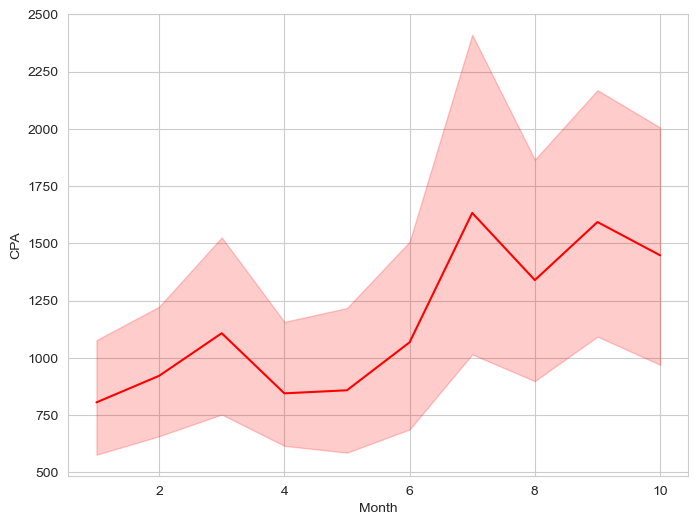

In [84]:
#Строим график
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(data = df_kolok[df_kolok['CPA'] > 0], x="Month", y="CPA", color='red')

<Axes: xlabel='Month', ylabel='CTR'>

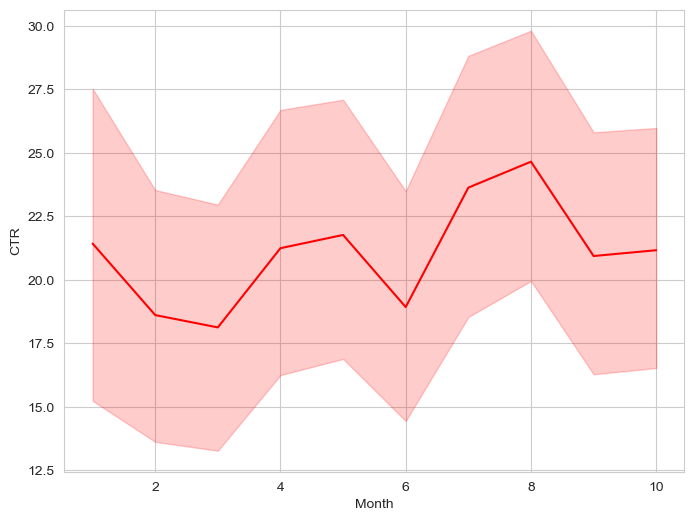

In [82]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(data = df_kolok[df_kolok['CTR'] > 0], x="Month", y="CTR", color='red')

<Axes: xlabel='Month', ylabel='CPC'>

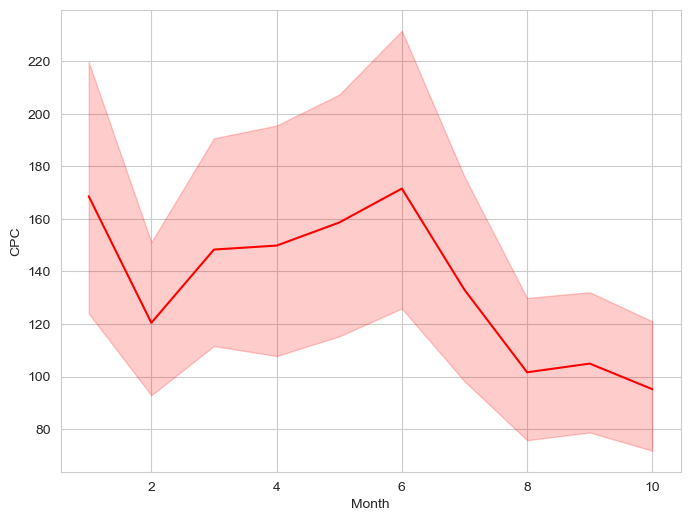

In [80]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(data = df_kolok[df_kolok['CPC'] > 0], x="Month", y="CPC", color='red')

In [72]:
grouped_df = df_kolok.groupby(['Month']).agg({
    'Clicks': 'sum',
    'Conversions': 'sum'
}).reset_index()

# Рассчитываем CR для каждой группы
grouped_df['CR'] = grouped_df.apply(lambda row: calculate_cr(row['Conversions'], row['Clicks']), axis=1)


<Axes: xlabel='Month', ylabel='CR'>

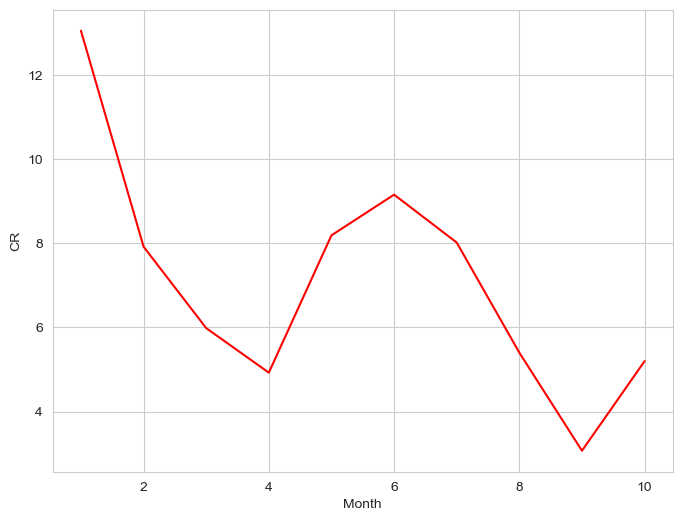

In [78]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(data = grouped_df[grouped_df['CR'] > 0], x="Month", y="CR", color='red')

Мы убедились что показатель CPA упал (дописать)
Нужно проанализировать конкурентов 